<a href="https://colab.research.google.com/github/mdc5017/Comp-Vision-CW/blob/main/colab_DN4_heart_stomach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file is used to test the trained model on heart and stomach tissue. \
If you want to test different network architectures, please modify the import file below in DN4_Test_5way5shot.py.\
And change the --resume parameter to the corresponding directory. 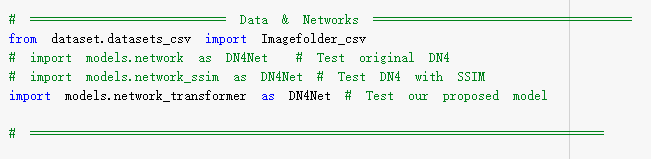


In [ ]:
import time
import h5py
import copy
import cv2 as cv
import numpy as np
from numpy import zeros, newaxis
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image
!pip install pytorch-msssim

torch.manual_seed(1)
!git clone https://github.com/Blair129/DN4-master_new.git

Cloning into 'DN4-master_new'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (347/347), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 347 (delta 165), reused 289 (delta 111), pack-reused 0
Receiving objects: 100% (347/347), 15.76 MiB | 24.71 MiB/s, done.
Resolving deltas: 100% (165/165), done.


Download Heart Tissue Dataset

In [ ]:
# Heart tissue data, you can use the command below to download the data 
# or upload the data from your local computer to the directory /content/
!gdown --id 1GxGqqe3mbmRnqTQPB42rSEM7y-UZwBVW
!unzip -q /content/heart_few_shot_data_train.zip

Downloading...
From: https://drive.google.com/uc?id=1GxGqqe3mbmRnqTQPB42rSEM7y-UZwBVW
To: /content/heart_few_shot_data_train.zip
100% 56.6M/56.6M [00:00<00:00, 155MB/s]


Download Stomach Tissue Dataset

In [ ]:
# If you want to test the model on the stomach tissue, use the command below
# or upload the data to the directory /content/
!gdown --id 1wI_ff0oGqaMp60MtkkPJw1ndUJn5wy5X
!unzip -q '/content/stomach_classification_dataset.zip'

Downloading...
From: https://drive.google.com/uc?id=1wI_ff0oGqaMp60MtkkPJw1ndUJn5wy5X
To: /content/stomach_classification_dataset.zip
100% 62.1M/62.1M [00:01<00:00, 55.6MB/s]


In [ ]:
pwd

'/content'

In [ ]:
import os
!pip install patchify


from patchify import patchify, unpatchify
%cd /content/content/heart_few_shot_data_train/images


path = "/content/content/heart_few_shot_data_train/images"
outPath ="/content/content/heart_few_shot_data_train_patches/images" #specify outPath where do we want to save patches


for image_path in os.listdir():
    if image_path.endswith(".jpg"):
      img = cv.imread(path_name+'/'+image_path)
      print("hi")
      print(str(outPath)+"/"+image_path.strip('.jpg')+"_3.jpg")
      break

/content/content/heart_few_shot_data_train/images
hi
/content/content/heart_few_shot_data_train_patches/images/7100_3.jpg


In [ ]:
# divide images in 4 patches and input these to test function

import os
!pip install patchify


from patchify import patchify, unpatchify
%cd /content/content/heart_few_shot_data_train/images


path_name = "/content/content/heart_few_shot_data_train/images"
outPath ="/content/content/heart_few_shot_data_train_patches/images" #specify outPath where do we want to save patches


for image_path in os.listdir():
    if image_path.endswith(".jpg"):
      img = cv.imread(path_name+'/'+image_path)

      #image_name = os.path.splitext(image_path)[0]
      ##########################################
      # At first vertical devide image         #
      ##########################################
      # start vertical devide image      
      heightOriginal = img.shape[0]
      widthOriginal = img.shape[1]

      height = img.shape[0]
      width = img.shape[1]
      # Cut the image in half
      width_cutoff = width // 2
      left1 = img[:, :width_cutoff]
      right1 = img[:, width_cutoff:]
      # finish vertical devide image
              
      ##########################################
      # At first Horizontal devide left1 image #
      ##########################################
      #rotate image LEFT1 to 90 CLOCKWISE
      img = cv.rotate(left1, cv.ROTATE_90_CLOCKWISE)
      # start vertical devide image
      height = img.shape[0]
      width = img.shape[1]
      # Cut the image in half
      width_cutoff = width // 2
      l1 = img[:, :width_cutoff]
      l2 = img[:, width_cutoff:]
      # finish vertical devide image
      #rotate image to 90 COUNTERCLOCKWISE
      l1 = cv.rotate(l1, cv.ROTATE_90_COUNTERCLOCKWISE)
      # resize the image into original size
      l1 = cv.resize(l1,(widthOriginal,heightOriginal))
      #save
      cv.imwrite(str(outPath)+"/"+image_path.strip('.jpg')+"_1.jpg", l1)
      #rotate image to 90 COUNTERCLOCKWISE
      l2 = cv.rotate(l2, cv.ROTATE_90_COUNTERCLOCKWISE)
      #save
      cv.imwrite(str(outPath)+"/"+image_path.strip('.jpg')+"_2.jpg", l2)
      ##########################################
      # At first Horizontal devide right1 image#
      ##########################################
      #rotate image RIGHT1 to 90 CLOCKWISE
      img = cv.rotate(right1, cv.ROTATE_90_CLOCKWISE)
      # resize the image into original size
      l2 = cv.resize(l2, (widthOriginal, heightOriginal))
      # start vertical devide image
      height = img.shape[0]
      width = img.shape[1]
      # Cut the image in half
      width_cutoff = width // 2
      r1 = img[:, :width_cutoff]
      r2 = img[:, width_cutoff:]
      # finish vertical devide image
      #rotate image to 90 COUNTERCLOCKWISE
      r1 = cv.rotate(r1, cv.ROTATE_90_COUNTERCLOCKWISE)      
      # resize the image into original size
      r1 = cv.resize(r1, (widthOriginal, heightOriginal))
      #save
      cv.imwrite(str(outPath)+"/"+image_path.strip('.jpg')+"_3.jpg", r1)
      #rotate image to 90 COUNTERCLOCKWISE
      r2 = cv.rotate(r2, cv.ROTATE_90_COUNTERCLOCKWISE)      
      # resize the image into original size
      r2 = cv.resize(r2, (widthOriginal, heightOriginal))
      #save
      cv.imwrite(str(outPath)+"/"+image_path.strip('.jpg')+"_4.jpg", r2)


/content/content/heart_few_shot_data_train/images


In [ ]:
import csv
outPath ="/content/content/heart_few_shot_data_train_patches" #specify outPath where do we want to save patches
imageFolderPath ="/content/content/heart_few_shot_data_train_patches/images" #specify outPath where do we want to save patches

with open(outPath,"w",newline='')as f:
        b_csv = csv.writer(f, dialect='excel')
        # write the first row
        b_csv.writerow(['filename', 'label'])
        # read image patches names
        for image_path in os.listdir(imageFolderPath):
            #print(image_path)
            # write image patches names
            b_csv = csv.writer(f,dialect='excel')
            b_csv.writerow(['queryimages'+'/'+image_path ,'2'])



IsADirectoryError: ignored

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:

#for image_path in os.listdir():
 # if image_path.endswith("")
  #    print(image_path)
        # read the file
 #       im = cv.imread(path)

        # split image into patches        
  #      im_patches = image_slicer.slice(im, 4)

        # create full output path, 'example.jpg' 
        # becomes 'rotate_example.jpg', save the file to disk
   #     fullpath = os.path.join(outPath, image_path)
    #    misc.imsave(fullpath, im_Patches)

SyntaxError: ignored

In [ ]:
cd /content/DN4-master_new/DN4-master

/content/DN4-master_new/DN4-master


If you want to test the model on heart tissue, run the command below\
The trained models are in the results folder, change the dir below to test other models

In [ ]:
!python DN4_Test_5way5shot.py --resume /content/DN4-master_new/DN4-master/results/DN4_DA_heart_Conv64F_3Way_5Shot_K3_Transformer/model_best.pth.tar --basemodel Conv64F  --dataset_dir '/content/content/heart_few_shot_data_train_patches'  --way_num 3

Namespace(basemodel='Conv64F', beta1=0.5, clamp_lower=-0.01, clamp_upper=0.01, cuda=True, data_name='miniImageNet', dataset_dir='/content/content/heart_few_shot_data_train_patches', episodeSize=1, episode_test_num=600, episode_train_num=10000, episode_val_num=1000, epochs=30, imageSize=84, lr=0.005, mode='test', nc=3, neighbor_k=3, ngpu=1, outf='./results/DN4_miniImageNet_Conv64F_3Way_5Shot_K3', print_freq=100, query_num=15, resume='/content/DN4-master_new/DN4-master/results/DN4_DA_heart_Conv64F_3Way_5Shot_K3_Transformer/model_best.pth.tar', shot_num=5, testepisodeSize=1, way_num=3, workers=8)
initialization method [normal]
=> no checkpoint found at '/content/DN4-master_new/DN4-master/results/DN4_DA_heart_Conv64F_3Way_5Shot_K3_Transformer/model_best.pth.tar'
FourLayer_64F(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyR

If you want to test the model on stomach tissue, run the command below


In [ ]:
!python DN4_Test_5way5shot.py --resume /content/DN4-master_new/DN4-master/results/DN4_DA_stomach_Conv64F_3Way_5Shot_K3_Transformer/model_best.pth.tar --basemodel Conv64F  --dataset_dir '/content/stomach_classification_dataset'  --way_num 3

Namespace(basemodel='Conv64F', beta1=0.5, clamp_lower=-0.01, clamp_upper=0.01, cuda=True, data_name='miniImageNet', dataset_dir='/content/stomach_classification_dataset', episodeSize=1, episode_test_num=600, episode_train_num=10000, episode_val_num=1000, epochs=30, imageSize=84, lr=0.005, mode='test', nc=3, neighbor_k=3, ngpu=1, outf='./results/DN4_miniImageNet_Conv64F_3Way_5Shot_K3', print_freq=100, query_num=15, resume='/content/DN4-master_new/DN4-master/results/DN4_DA_stomach_Conv64F_3Way_5Shot_K3_Transformer/model_best.pth.tar', shot_num=5, testepisodeSize=1, way_num=3, workers=8)
initialization method [normal]
=> loading checkpoint '/content/DN4-master_new/DN4-master/results/DN4_DA_stomach_Conv64F_3Way_5Shot_K3_Transformer/model_best.pth.tar'
=> loaded checkpoint '/content/DN4-master_new/DN4-master/results/DN4_DA_stomach_Conv64F_3Way_5Shot_K3_Transformer/model_best.pth.tar' (epoch 2)
FourLayer_64F(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1),

If you want to train the model yourself please check the DN4 github and follow the training the instructions.